 <h1 style="text-align:center; font-size:40px; font-weight:bold; color:#4A90E2;">DATAHUT QA ASSIGNMENT</h1>
 <h2 style="text-align:center; font-size:28px; color:#4A90E2;">Topic: Data Cleaning & Quality Assurance</h2>
 <hr style="height:3px; background-color:#4A90E2; border:none;">

<h3 style=" font-size:22px;color:#4A90E2;"> <b>NAME:</b> RISHANA SKP </h3>
<h3 style=" font-size:22px;color:#4A90E2;"> <b>ORGANIZATION:</b> DATAHUT </h3>
<h3 style=" font-size:22px;color:#4A90E2;"> <b>DATE:</b> 19-02-2025 </h3>
<br>

<h2 style="color:#4A90E2; font-family: Arial, sans-serif;">1. Introduction</h2>

<p>Data cleaning is a crucial step in the data preparation process, ensuring that datasets are free from errors and inconsistencies. Raw data often contains missing values, duplicates, incorrect formats, and inconsistencies, which must be addressed before conducting any meaningful analysis.  
This assignment focuses on identifying and rectifying data quality issues.</p>

<h2 style="color:#4A90E2; font-family: Arial, sans-serif;">Objective:</h2>
<p>Identify and rectify data quality issues in the provided dataset.<br>
Implement systematic data cleaning techniques.<br>
Generate a cleaned dataset ready for further analysis.</p>

<h2 style="color:#4A90E2; font-family: Arial, sans-serif;">Key Cleaning Tasks:</h2>
<p>Handling <em>missing values</em> using appropriate imputation techniques.<br>
<em>Removing duplicates</em> to avoid redundancy.<br>
<em>Standardizing formats</em> for names, emails, and dates.<br>
Validating and correcting <em>email addresses</em>.<br>
Performing <em>statistical analysis</em> and deriving insights.</p>


<h2 style="color:#4A90E2; font-family: Arial, sans-serif;">2. Assumptions and Considerations</h2>

<p>Before starting the cleaning process, several assumptions were made regarding the data:</p>

<p>Handling missing values: Numerical columns like age and salary had missing values imputed using the median, as it is less affected by outliers. Categorical columns like department and name had missing values replaced with the most frequent value (mode) or a placeholder like "Unknown".</p>

<p>Email validation and correction: Email addresses were expected to follow the standard pattern username@domain.com. Invalid email formats were either corrected if possible or removed if they were entirely incorrect.</p>

<p>Duplicate handling: Exact duplicates were dropped. 

Standardization of text and dates: Names were converted to title case (e.g., "john doe" → "John Doe"). Dates were formatted to the YYYY-MM-DD format for consistency.


<h2 style="color:#4A90E2; font-family: Arial, sans-serif;">3. Data Cleaning Process</h2>

 The following steps were performed systematically to clean the dataset and ensure high data quality.

In [103]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [104]:
# Load dataset
df = pd.read_csv('messy_data.csv')
df

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.000000,Sales
1,1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.000000,NaN
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.000000,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.000000,SupportJ
4,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
...,...,...,...,...,...,...,...,...
10995,6523,07c223be-03e6-4f70-a2b5-86df778cc61a,NaN,NaN,NaN,NaN,NaN,NaN
10996,9785,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38.0,molly89gmail.com,2021-06-24,NaN,Sales
10997,7826,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR
10998,7648,783b36b4-d09f-46c9-8a52-7ff96b80863e,Bonnie Benitez,37.0,roypark@warren.net,2020-10-09,147322.005171,Support


<h3 style="color:#4A90E2; font-family: Arial, sans-serif;">Data Exploration</h3>

In [105]:
# Display basic dataset info
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11000 non-null  int64  
 1   ID          11000 non-null  object 
 2   Name        8667 non-null   object 
 3   Age         9253 non-null   float64
 4   Email       9731 non-null   object 
 5   Join Date   8808 non-null   object 
 6   Salary      8761 non-null   float64
 7   Department  8745 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 687.6+ KB
None


In [106]:
# Preview the first 5 rows
df.head()

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.0,Sales
1,1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.0,NaN
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.0,Marketing


In [107]:
# Preview the last 5 rows
df.tail()

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
10995,6523,07c223be-03e6-4f70-a2b5-86df778cc61a,NaN,NaN,NaN,NaN,NaN,NaN
10996,9785,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38.0,molly89gmail.com,2021-06-24,NaN,Sales
10997,7826,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR
10998,7648,783b36b4-d09f-46c9-8a52-7ff96b80863e,Bonnie Benitez,37.0,roypark@warren.net,2020-10-09,147322.005171,Support
10999,7107,fc25a38a-5747-46eb-b6d3-7173f8255809,Caroline Ochoa,53.0,cdavis@hodges.com,2023-08-10,149224.000000,Support


In [108]:
df.shape

(11000, 8)

In [109]:
#data types
df.dtypes

Unnamed: 0      int64
ID             object
Name           object
Age           float64
Email          object
Join Date      object
Salary        float64
Department     object
dtype: object

In [110]:
#summary statistics for numerical columns
df.describe()

,Unnamed: 0,Age,Salary
count,11000.000000,9253.000000,8761.000000
mean,5012.947818,54.162650,89886.585012
std,2884.739158,21.072919,34896.320117
min,0.000000,18.000000,24655.136613
25%,2509.750000,36.000000,59723.844874
50%,5024.500000,54.000000,89241.000000
75%,7510.250000,72.000000,119491.000000
max,9999.000000,90.000000,176156.206747


In [111]:
#summary for categorical columns
df.describe(include = 'object').transpose()

,count,unique,top,freq
ID,11000,10000,0413800c-975f-4107-908c-f9f733496b3c,2
Name,8667,7929,Elizabeth Williams,6
Email,9731,9160,fwilliams@yahoo.com,3
Join Date,8808,3338,2022-03-31,12
Department,8745,264,Support,1425


* There are 11,000 IDs, but only 10,000 unique, meaning some IDs are duplicated. The most repeated ID appears twice.
* Out of 8,667 non-null names, only 7,929 are unique, meaning some names repeat."Elizabeth Williams" is the most common name, appearing 6 times.
* There are 9,731 non-null emails, with 9,160 unique, indicating some duplicates. "fwilliams@yahoo.com" is the most frequent email, appearing 3 times.
* There are 8,808 non-null dates, but only 3,338 unique dates, meaning multiple people joined on the same dates. The most frequent join date is March 31, 2022, appearing 12 times.
* Only 264 unique departments exist."Support" is the most common department, with 1,425 employees assigned to it.

In [112]:
df.duplicated().sum()

291

In [113]:
# Check for missing values
df.isnull().sum()

Unnamed: 0       0
ID               0
Name          2333
Age           1747
Email         1269
Join Date     2192
Salary        2239
Department    2255
dtype: int64

In [114]:
#unique value counts for each column
for column in df.columns:
    unique_values_count = df[column].nunique()
    print(f"Unique values count for {column}: {unique_values_count}")

Unique values count for Unnamed: 0: 10000
Unique values count for ID: 10000
Unique values count for Name: 7929
Unique values count for Age: 73
Unique values count for Email: 9160
Unique values count for Join Date: 3338
Unique values count for Salary: 8122
Unique values count for Department: 264


In [115]:
# Dropping the unnecessary 'Unnamed: 0'
# Reason: This column not needed for analysis.
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,ID,Name,Age,Email,Join Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.000000,Sales
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.000000,NaN
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.000000,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.000000,SupportJ
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
...,...,...,...,...,...,...,...
10995,07c223be-03e6-4f70-a2b5-86df778cc61a,NaN,NaN,NaN,NaN,NaN,NaN
10996,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38.0,molly89gmail.com,2021-06-24,NaN,Sales
10997,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR
10998,783b36b4-d09f-46c9-8a52-7ff96b80863e,Bonnie Benitez,37.0,roypark@warren.net,2020-10-09,147322.005171,Support


In [116]:
# Count missing values row-wise
missing_counts = df.isnull().sum(axis=1)

# Filter rows where missing values exceed 5
empty_rows = df.loc[missing_counts > 5]

# Print the number of affected rows
print(f"Number of rows with more than 5 missing values: {empty_rows .shape[0]}")

# Display the first few rows
empty_rows .head()

Number of rows with more than 5 missing values: 1269


,ID,Name,Age,Email,Join Date,Salary,Department
18,05e36d3f-6422-4329-80b2-1fd3543ee254,NaN,NaN,NaN,NaN,NaN,NaN
19,a8b6e8e3-f2f2-42c6-b2d7-2bbfd9b91125,NaN,NaN,NaN,NaN,NaN,NaN
24,3f741e1f-f781-463e-a12a-871d3866c711,NaN,NaN,NaN,NaN,NaN,NaN
30,754d31ea-7749-4d29-b0f1-a8fb908d541c,NaN,NaN,NaN,NaN,NaN,NaN
40,9aa93a07-4dac-4c44-bdde-0424c118041f,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
# Remove rows where more than 5 columns have missing values
df = df.dropna(thresh=df.shape[1] - 5)

# Display the updated shape of the dataset
print(f"Updated dataset shape: {df.shape}")

Updated dataset shape: (9731, 7)


In [118]:
df

,ID,Name,Age,Email,Join Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.000000,Sales
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.000000,NaN
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.000000,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.000000,SupportJ
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
...,...,...,...,...,...,...,...
10994,6714ff24-3600-4c6e-8eed-5b4224bd9e44,Karen Wells,29.0,cheryllewis@hotmail.com,NaN,147555.000000,Engineering
10996,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38.0,molly89gmail.com,2021-06-24,NaN,Sales
10997,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR
10998,783b36b4-d09f-46c9-8a52-7ff96b80863e,Bonnie Benitez,37.0,roypark@warren.net,2020-10-09,147322.005171,Support


In [119]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<h3 style="color:#4A90E2; font-family: Arial, sans-serif;">Handling Missing Values</h3>

* Missing values can distort analysis and lead to incorrect conclusions.  
* Numerical values: Filled using median to avoid skewing due to outliers.  
* Categorical values: Replaced with most frequent value (mode) or 'unknown` where applicable. 

In [120]:
Over_age= df[df["Age"] >65 ]
Over_age

,ID,Name,Age,Email,Join Date,Salary,Department
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.000000,NaN
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.000000,Engineering
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81.0,milleryvonne@fowler-york.com,15/10/2016,123018.000000,SupportE
6,c4892dbb-2554-4ce1-8f11-f6597d7f6782,Patricia Brown DVM,66.0,pperkinshotmail.com,17/09/2020,77311.000000,HR
...,...,...,...,...,...,...,...
10976,bf3750e3-52dd-4778-af1d-1d28bf150340,Sharon Griffin,87.0,hadams@hotmail.com,2023-01-30,34529.000000,NaN
10977,f197eeea-6d40-44b9-ab25-abdde24dec54,Nicholas Chavezsituation,86.0,cjohnsonhotmail.com,16/11/1979,29196.703578,NaN
10986,a09fc4c8-eca3-4eec-bd4c-64540dcd2f7e,Madison Mclaughlin,74.0,lorraineestrada@morgan.org,2024-03-24,50557.049244,Marketing
10991,612011e6-101d-4ee2-bbca-16a5056d8217,Jeffrey Elliottnation,72.0,jpatterson@wise.org,2021-08-05,50510.777098,Support


In [121]:
# Capping Age at 65 using np.where()
df['Age'] = np.where(df['Age'] > 65, 65, df['Age'])

In [122]:
df.isnull().sum()

ID               0
Name          1038
Age            472
Email            0
Join Date      910
Salary         956
Department     970
dtype: int64

In [123]:
# Filling  missing values 
df['Name'] = df['Name'].fillna('Unknown')

df['Age'].fillna(df['Age'].median(), inplace=True)

df['Department'] = df['Department'].fillna('Unknown')

we have to fill missing salary column with department average

In [124]:
# Calculate the mode of the 'Join Date' column (handling empty mode)
if not df['Join Date'].mode().empty:
    mode_join_date = df['Join Date'].mode()[0]
    df['Join Date'].fillna(mode_join_date, inplace=True)

In [125]:
df

,ID,Name,Age,Email,Join Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,2020-07-20,88552.000000,Sales
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,65.0,Jillian Jenkins,2022-07-07,139227.000000,Unknown
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,65.0,jscottgreen.biz,2023-11-21,65550.000000,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.000000,SupportJ
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,65.0,figueroakayla@yahoo.com,2020-07-20,143456.000000,Marketing
...,...,...,...,...,...,...,...
10993,796f8c0b-15a4-475c-bb02-ac892df0c746,Shelley Hopkinslive,65.0,Michael Walker,25/12/1992,47809.000000,HR
10994,6714ff24-3600-4c6e-8eed-5b4224bd9e44,Karen Wells,29.0,cheryllewis@hotmail.com,2020-07-20,147555.000000,Engineering
10996,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38.0,molly89gmail.com,2021-06-24,NaN,Sales
10997,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,54.0,robert96@pollard-frye.com,15/08/2006,122609.594149,HR


<h3 style="color:#4A90E2; font-family: Arial, sans-serif;">Removing Duplicates</h3>

We have noticed that some ID's are duplicated. Lets handle those duplicates

In [126]:
# Find and sort duplicate IDs
duplicates = df[df.duplicated('ID', keep=False)].sort_values(by='ID')

# Display the first 8 duplicate records
duplicates.head(8)

,ID,Name,Age,Email,Join Date,Salary,Department
1009,0053781e-61aa-423e-ae39-adc1ee24f24c,Ronald Morgan,43.0,chelsea56richardson.com,23/02/2020,140100.000000,Marketing
10664,0053781e-61aa-423e-ae39-adc1ee24f24c,Ronald Morganlikely,43.0,chelsea56@richardson.com,2022-01-02,140100.000000,MarketingD
7942,00ac2b1c-dcc9-4e5f-a72a-b5c5e0fe092e,Tammy Thomasbudget,65.0,vaughnmatthew@moyer-walton.com,13/08/1991,63500.000000,Marketing
10065,00ac2b1c-dcc9-4e5f-a72a-b5c5e0fe092e,Tammy Thomas,65.0,vaughnmatthew@moyer-walton.com,2020-03-17,63500.000000,Marketing
10094,00d23202-87b8-49bf-bec4-deea25ca43f4,Kelsey Gutierrezwind,41.0,lucerohaley@rollins.com,2020-07-20,44371.000000,HRT
9851,00d23202-87b8-49bf-bec4-deea25ca43f4,Kelsey Gutierrezsummer,41.0,lucerohaleyrollins.com,2020-07-20,36948.174044,HR
10760,011cf560-4320-4c27-8cb4-4588e1924879,Unknown,46.0,devin27@wright.info,2024-05-19,40296.000000,HRC
7110,011cf560-4320-4c27-8cb4-4588e1924879,Unknown,46.0,devin27@wright.info,2024-05-19,40296.000000,HRZ


In [127]:
#check for valid email
import re

def is_valid_email(email):
    return bool(re.match(r'^[\w\.-]+@[\w\.-]+\.\w{2,}$', str(email)))

In [128]:

# Function to merge duplicate rows based on specific criteria
def merge_duplicates(group):
    group_sorted = group.sort_values(by='Join Date', ascending=False)
    merged = group_sorted.iloc[0].copy()

    for _, row in group_sorted.iterrows():
        merged['Name'] = row['Name'] if pd.notnull(row['Name']) else merged['Name']
        merged['Email'] = row['Email'] if pd.notnull(row['Email']) and is_valid_email(row['Email']) else merged['Email']
        merged['Department'] = row['Department'] if pd.notnull(row['Department']) else merged['Department']
        merged['Salary'] = row['Salary'] if pd.notnull(row['Salary']) else merged['Salary']

    return merged

# Identify duplicate IDs
duplicate_ids = df[df.duplicated('ID', keep=False)]['ID'].unique()

# Process duplicate and non-duplicate rows
cleaned_rows = [merge_duplicates(group) if group['ID'].iloc[0] in duplicate_ids else group.iloc[0] 
                for _, group in df.groupby('ID')]

# Create a cleaned DataFrame
df_cleaned = pd.DataFrame(cleaned_rows)

# Display the cleaned DataFrame
df=df_cleaned
df

,ID,Name,Age,Email,Join Date,Salary,Department
4626,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Kevin Stone,61.0,nancyortega@gmail.com,2021-10-19,139842.0,Engineering
2421,000e34f7-8b09-469d-bb06-dc80c99ff254,Steven Morales,65.0,richard72hotmail.com,2020-07-20,68845.0,Marketing
1355,000ea181-5552-4a36-b151-1d57483b5a31,Natalie Chapman,27.0,aliciawright@yahoo.com,2021-05-22,56616.0,Support
8242,000ebe72-241a-4c74-9bd5-f0b1c0195760,Felicia Simmons,65.0,mlewis@hotmail.com,06/09/1983,62610.0,HR
3419,002a244f-c467-4bec-9ab9-0eea2d1e3626,Travis Garciablack,65.0,gmedina@wilson-scott.com,2020-02-17,49203.0,HR
...,...,...,...,...,...,...,...
6346,ffe82360-c2a2-4e75-a553-00987100992e,Makayla Andersenteam,54.0,leon97hotmail.com,2023-05-16,31626.0,Engineering
6045,ffec6404-7edf-463d-8a61-909b38e9c185,Gina Browndown,65.0,joseph11@williams.com,03/01/2024,51202.0,Sales
1784,fff55723-981a-4646-b95c-1f33543e97d6,Jessica White,48.0,hpope@gmail.com,2021-02-16,NaN,Marketing
8705,fff59b6d-2e25-40a4-969d-c808e268b180,Unknown,48.0,michael30@crane.com,09/05/1996,100996.0,Unknown


<h3 style="color:#4A90E2; font-family: Arial, sans-serif;">Standardise Date Formats</h3>


In [129]:
# Display unique date formats
print("Unique Date Formats:\n", df['Join Date'].unique())

Unique Date Formats:
 ['2021-10-19' '2020-07-20' '2021-05-22' ... '01/08/1989' '03/01/2024'
 '25/02/2012']


In [130]:
# Ensure 'Join Date' is in datetime format
df['Join Date'] = pd.to_datetime(df['Join Date'], errors='coerce')

In [131]:
from dateutil import parser

# Function to  parse dates
def parse_date(date):
    try:
        return parser.parse(str(date)).strftime('%Y-%m-%d')  # Standard format
    except Exception:
        return None  # Return None for unparseable dates

# Apply parsing function
df['Join Date'] = df['Join Date'].apply(parse_date)

# Identify rows where date parsing failed
invalid_dates = df[df['Join Date'].isnull()]
print("\nRows with Invalid Join Dates:\n", invalid_dates)


Rows with Invalid Join Dates:
                                         ID                 Name   Age  \
8242  000ebe72-241a-4c74-9bd5-f0b1c0195760      Felicia Simmons  65.0   
1009  0053781e-61aa-423e-ae39-adc1ee24f24c  Ronald Morganlikely  43.0   
5688  0072da89-71b4-4ae9-b59d-9e77fec1f2bc         Molly Walker  46.0   
6519  00735eb0-1a59-48af-8563-5a2c067717cd    Heather Larsoncut  31.0   
2789  007c0c99-5440-4028-a144-6afdb52487a9              Unknown  37.0   
...                                    ...                  ...   ...   
6193  ffb44ce0-d48c-47f4-aa13-fd3923f89343      Ronnie Williams  29.0   
88    ffc4a5a6-7ab4-46fb-a876-ea396ab9c241            Ryan Ward  65.0   
6045  ffec6404-7edf-463d-8a61-909b38e9c185       Gina Browndown  65.0   
8705  fff59b6d-2e25-40a4-969d-c808e268b180              Unknown  48.0   
7292  ffffcb54-aed9-49fb-9bb7-7a72f335b1d5       Thomas Edwards  65.0   

                          Email Join Date         Salary  Department  
8242         mlewis@

In [132]:
# Count missing values in 'Join Date'
missing_dates = df['Join Date'].isna().sum()
print(f"\nTotal Missing Join Dates: {missing_dates}")

# Display cleaned data
print("\nCleaned Data Preview:\n", df.head())


Total Missing Join Dates: 1633

Cleaned Data Preview:
                                         ID                Name   Age  \
4626  0008fab3-6dd9-4c36-8ea1-183d8dbd9228         Kevin Stone  61.0   
2421  000e34f7-8b09-469d-bb06-dc80c99ff254      Steven Morales  65.0   
1355  000ea181-5552-4a36-b151-1d57483b5a31     Natalie Chapman  27.0   
8242  000ebe72-241a-4c74-9bd5-f0b1c0195760     Felicia Simmons  65.0   
3419  002a244f-c467-4bec-9ab9-0eea2d1e3626  Travis Garciablack  65.0   

                         Email   Join Date    Salary   Department  
4626     nancyortega@gmail.com  2021-10-19  139842.0  Engineering  
2421      richard72hotmail.com  2020-07-20   68845.0    Marketing  
1355    aliciawright@yahoo.com  2021-05-22   56616.0      Support  
8242        mlewis@hotmail.com        None   62610.0           HR  
3419  gmedina@wilson-scott.com  2020-02-17   49203.0           HR  


In [133]:
# Convert 'Join Date' to datetime, handling errors by converting invalid entries to NaT
df['parsed_date'] = pd.to_datetime(df['Join Date'], errors='coerce')

# Find and print rows where the date couldn't be parsed
invalid_dates = df[df['parsed_date'].isnull()]
print("Invalid dates:\n", invalid_dates)

# Convert parsed dates to standard format (YYYY-MM-DD), keeping NaT for invalid values
df['standard_date'] = df['parsed_date'].dt.strftime('%Y-%m-%d')

# Drop the original and parsed date columns
df.drop(columns=['Join Date', 'parsed_date'], inplace=True)

# Rename the standardized date column
df.rename(columns={'standard_date': 'Join Date'}, inplace=True)

# Print the first few rows
print(df.head())

# Count and print the number of missing dates
missing_dates_count = df['Join Date'].isna().sum()
print("Number of missing dates:", missing_dates_count)

Invalid dates:
                                         ID                 Name   Age  \
8242  000ebe72-241a-4c74-9bd5-f0b1c0195760      Felicia Simmons  65.0   
1009  0053781e-61aa-423e-ae39-adc1ee24f24c  Ronald Morganlikely  43.0   
5688  0072da89-71b4-4ae9-b59d-9e77fec1f2bc         Molly Walker  46.0   
6519  00735eb0-1a59-48af-8563-5a2c067717cd    Heather Larsoncut  31.0   
2789  007c0c99-5440-4028-a144-6afdb52487a9              Unknown  37.0   
...                                    ...                  ...   ...   
6193  ffb44ce0-d48c-47f4-aa13-fd3923f89343      Ronnie Williams  29.0   
88    ffc4a5a6-7ab4-46fb-a876-ea396ab9c241            Ryan Ward  65.0   
6045  ffec6404-7edf-463d-8a61-909b38e9c185       Gina Browndown  65.0   
8705  fff59b6d-2e25-40a4-969d-c808e268b180              Unknown  48.0   
7292  ffffcb54-aed9-49fb-9bb7-7a72f335b1d5       Thomas Edwards  65.0   

                          Email Join Date         Salary  Department  \
8242         mlewis@hotmail.com    

In [134]:
df['Join Date'].isna().sum()

1633

<h3 style="color:#4A90E2; font-family: Arial, sans-serif;">Standardise Department Names</h3>

In [135]:
print(df['Department'].unique())

['Engineering' 'Marketing' 'Support' 'HR' 'Unknown' 'SalesE' 'MarketingD'
 'HRp' 'SupportY' 'Sales' 'HRT' 'SupportQ' 'HRr' 'HRC' 'EngineeringS'
 'SupportS' 'HRl' 'HRf' 'Salesz' 'Engineeringl' 'SupportA' 'Supportl'
 'Engineeringm' 'SupportX' 'MarketingN' 'EngineeringT' 'Engineeringn'
 'SupportT' 'Supportk' 'Salesn' 'SalesJ' 'Engineeringq' 'EngineeringB'
 'MarketingE' 'MarketingO' 'Supporty' 'MarketingV' 'HRB' 'EngineeringR'
 'MarketingX' 'HRJ' 'MarketingQ' 'Supportu' 'SupportD' 'EngineeringF'
 'Engineeringt' 'Marketingr' 'EngineeringU' 'HRk' 'SalesO' 'HRm'
 'SupportE' 'SalesB' 'Supportw' 'EngineeringD' 'HRy' 'Supportf'
 'EngineeringP' 'Supportc' 'MarketingS' 'SupportB' 'Supportg' 'HRv' 'HRa'
 'SalesZ' 'Engineeringa' 'SupportH' 'EngineeringM' 'EngineeringE'
 'Engineeringb' 'MarketingK' 'Salesq' 'SalesR' 'SalesY' 'Supportm'
 'Salesw' 'Salesm' 'HRE' 'Marketingq' 'MarketingC' 'HRU' 'Salesj'
 'Marketingv' 'SupportO' 'SalesF' 'MarketingR' 'SupportI' 'Marketingy'
 'Engineeringx' 'EngineeringK'

In [136]:
# Define a function to correct department names using regex
def correct_department_name(department):
    # Define regex patterns
    patterns = {
        'Sales': r'^Sales[a-zA-Z]*$',
        'Support': r'^Support[a-zA-Z]*$',
        'Engineering': r'^Engineering[a-zA-Z]*$',
        'Marketing': r'^Marketing[a-zA-Z]*$',
        'HR': r'^HR[a-zA-Z]*$',
        'Unknown': r'^Unknown$'  # Exact match for 'Unknown'
    }
    
    # Check if department is 'Unknown'
    if department == 'Unknown':
        return department
    
    # Iterate through patterns to find correct category
    for category, pattern in patterns.items():
        if re.match(pattern, department):
            return category
    
    # If no match found, remove the last character and retry
    while department:
        department = department[:-1]  # Remove the last character
        for category, pattern in patterns.items():
            if re.match(pattern, department):
                return category
    
    # If no match found after all attempts, return the original department name
    return department

# Apply the correction function to the 'Department' column
df['Department'] = df['Department'].apply(correct_department_name)

# Display unique values in the 'Department' column after correction
print(df['Department'].unique())

['Engineering' 'Marketing' 'Support' 'HR' 'Unknown' 'Sales']


In [137]:
#Fills missing Salary based on department averages.
df['Salary'] = df.groupby('Department')['Salary'].transform(lambda x: x.fillna(x.mean()))
df['Salary'] = df['Salary'].round(0).astype(int)

<h3 style="color:#4A90E2; font-family: Arial, sans-serif;">Validating Emails</h3>

In [138]:
# Function to check if an email is valid
def is_valid_email(email):
    if pd.isna(email):  # Handle missing values
        return False
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return bool(re.match(pattern, str(email)))

# Count invalid emails
invalid_emails_count = df['Email'].apply(lambda x: not is_valid_email(x)).sum()

print("Number of invalid emails:", invalid_emails_count)


Number of invalid emails: 2070


In [139]:
# Function to check for professional email formats
def is_professional_email(email):
    if pd.isna(email):  # Handle missing values
        return False
    return bool(re.match(r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.(com|org|net|biz|info)$', str(email)))

# Filter DataFrame to retain only rows with professional emails
df = df[df['Email'].apply(is_professional_email)]

# Display filtered DataFrame
print(df.head())

                                        ID                Name   Age  \
4626  0008fab3-6dd9-4c36-8ea1-183d8dbd9228         Kevin Stone  61.0   
1355  000ea181-5552-4a36-b151-1d57483b5a31     Natalie Chapman  27.0   
8242  000ebe72-241a-4c74-9bd5-f0b1c0195760     Felicia Simmons  65.0   
3419  002a244f-c467-4bec-9ab9-0eea2d1e3626  Travis Garciablack  65.0   
5277  003c7fd4-950e-4b77-b5f8-d7ba82442be2     Catherine Smith  43.0   

                         Email  Salary   Department   Join Date  
4626     nancyortega@gmail.com  139842  Engineering  2021-10-19  
1355    aliciawright@yahoo.com   56616      Support  2021-05-22  
8242        mlewis@hotmail.com   62610           HR         NaN  
3419  gmedina@wilson-scott.com   49203           HR  2020-02-17  
5277      emily98@delgado.info   73783      Unknown  2022-04-04  


<h3 style="color:#4A90E2; font-family: Arial, sans-serif;">Cleaning Name Field</h3>

In [140]:
# Define a function to clean the 'Name' column

#Clean the Name column

# Assumption: Names should only contain alphabetic characters and spaces.Remove non-alphabetic characters at the end of the name and ensure proper capitalization.

def clean_name(name):
    if pd.isna(name):
        return name
    # Remove non-alphabetic characters from the end of the name
    name = re.sub(r'[^a-zA-Z\s]+$', '', name)
    # Ensure proper capitalization
    name = name.title()
    return name

# Apply the clean_name function to the 'Name' column
df['Name'] = df['Name'].astype(str).apply(clean_name)
df

,ID,Name,Age,Email,Salary,Department,Join Date
4626,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Kevin Stone,61.0,nancyortega@gmail.com,139842,Engineering,2021-10-19
1355,000ea181-5552-4a36-b151-1d57483b5a31,Natalie Chapman,27.0,aliciawright@yahoo.com,56616,Support,2021-05-22
8242,000ebe72-241a-4c74-9bd5-f0b1c0195760,Felicia Simmons,65.0,mlewis@hotmail.com,62610,HR,NaN
3419,002a244f-c467-4bec-9ab9-0eea2d1e3626,Travis Garciablack,65.0,gmedina@wilson-scott.com,49203,HR,2020-02-17
5277,003c7fd4-950e-4b77-b5f8-d7ba82442be2,Catherine Smith,43.0,emily98@delgado.info,73783,Unknown,2022-04-04
...,...,...,...,...,...,...,...
6579,ffe06285-05de-4899-aecc-c41c35546fc5,Victoria Sosa,28.0,cassandra78@hotmail.com,95228,Support,2022-09-02
6045,ffec6404-7edf-463d-8a61-909b38e9c185,Gina Browndown,65.0,joseph11@williams.com,51202,Sales,NaN
1784,fff55723-981a-4646-b95c-1f33543e97d6,Jessica White,48.0,hpope@gmail.com,90142,Marketing,2021-02-16
8705,fff59b6d-2e25-40a4-969d-c808e268b180,Unknown,48.0,michael30@crane.com,100996,Unknown,NaN


<h3 style="color:#4A90E2; font-family: Arial, sans-serif;">Data Type Conversion</h3>

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6838 entries, 4626 to 7292
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          6838 non-null   object 
 1   Name        6838 non-null   object 
 2   Age         6838 non-null   float64
 3   Email       6838 non-null   object 
 4   Salary      6838 non-null   int32  
 5   Department  6838 non-null   object 
 6   Join Date   5578 non-null   object 
dtypes: float64(1), int32(1), object(5)
memory usage: 400.7+ KB


In [142]:
# Convert column data types
df = df.astype({'Age': 'int', 'Name': 'string', 'Salary': 'int'})  

# Convert 'Join Date' to datetime format (handle errors)
df['Join Date'] = pd.to_datetime(df['Join Date'], errors='coerce')  

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6838 entries, 4626 to 7292
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          6838 non-null   object        
 1   Name        6838 non-null   string        
 2   Age         6838 non-null   int32         
 3   Email       6838 non-null   object        
 4   Salary      6838 non-null   int32         
 5   Department  6838 non-null   object        
 6   Join Date   5578 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(2), object(3), string(1)
memory usage: 374.0+ KB


<h3 style="color:#4A90E2; font-family: Arial, sans-serif;">Handling Salary Noise</h3>

In [144]:
# Check if any salary values are negative
negative_salaries = df[df["Salary"] < 0]

# Display rows with negative salary values
print(negative_salaries)

Empty DataFrame
Columns: [ID, Name, Age, Email, Salary, Department, Join Date]
Index: []


In [145]:
# Check if salary column has decimal values
decimal_salaries = df[df["Salary"] % 1 != 0]

# Display rows with decimal salaries
print(decimal_salaries)

Empty DataFrame
Columns: [ID, Name, Age, Email, Salary, Department, Join Date]
Index: []


In [146]:
# Summary statistics
df['Salary'].describe()

count      6838.000000
mean      90190.060837
std       33040.834079
min       26234.000000
25%       63817.500000
50%       90142.000000
75%      116687.750000
max      176156.000000
Name: Salary, dtype: float64

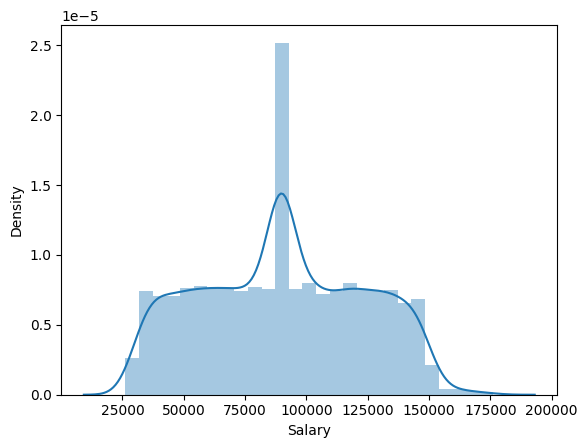

In [147]:
#outlier detection
sns.distplot(df['Salary'])
plt.show()

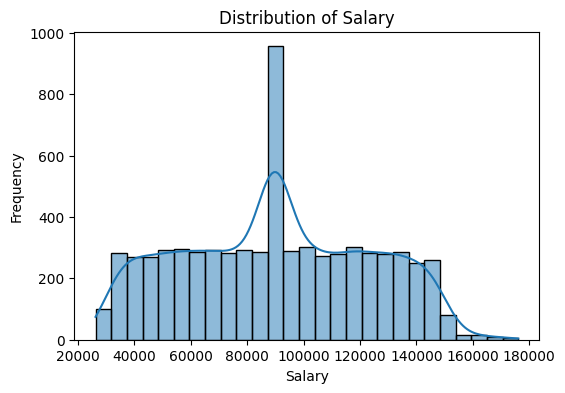

In [148]:
# Histogram to visualize distribution
plt.figure(figsize=(6, 4))
sns.histplot(data=df['Salary'], kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [149]:
# Identify outliers in 'Salary' using IQR method
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

lw = Q1 - 1.5 * IQR
uw = Q3 + 1.5 * IQR

#capping 'salary' column
df['Salary'] = np.where(df['Salary'] < lw, lw, df['Salary'])
df['Salary'] = np.where(df['Salary'] > uw, uw, df['Salary'])

In [150]:
df=df.reset_index(drop=True)

In [151]:
df

,ID,Name,Age,Email,Salary,Department,Join Date
0,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Kevin Stone,61,nancyortega@gmail.com,139842.0,Engineering,2021-10-19
1,000ea181-5552-4a36-b151-1d57483b5a31,Natalie Chapman,27,aliciawright@yahoo.com,56616.0,Support,2021-05-22
2,000ebe72-241a-4c74-9bd5-f0b1c0195760,Felicia Simmons,65,mlewis@hotmail.com,62610.0,HR,NaT
3,002a244f-c467-4bec-9ab9-0eea2d1e3626,Travis Garciablack,65,gmedina@wilson-scott.com,49203.0,HR,2020-02-17
4,003c7fd4-950e-4b77-b5f8-d7ba82442be2,Catherine Smith,43,emily98@delgado.info,73783.0,Unknown,2022-04-04
...,...,...,...,...,...,...,...
6833,ffe06285-05de-4899-aecc-c41c35546fc5,Victoria Sosa,28,cassandra78@hotmail.com,95228.0,Support,2022-09-02
6834,ffec6404-7edf-463d-8a61-909b38e9c185,Gina Browndown,65,joseph11@williams.com,51202.0,Sales,NaT
6835,fff55723-981a-4646-b95c-1f33543e97d6,Jessica White,48,hpope@gmail.com,90142.0,Marketing,2021-02-16
6836,fff59b6d-2e25-40a4-969d-c808e268b180,Unknown,48,michael30@crane.com,100996.0,Unknown,NaT


In [152]:
#saving cleanded data
df.to_csv('cleaned_dataset.csv', index=False)